# Notebook for manipulating aberrations in high magnification images
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pycroscopy/DTMicroscope/blob/main/notebooks/STEM/5_atom_finding_COLAB-Hackathon.ipynb)


### Theory by Gerd Duscher

### Notebook by Austin Houston

### Load libraries

In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.9.1':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

installing pyTEMlib
done


In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import sys
import os
%load_ext autoreload
%autoreload 2

if 'google.colab' in sys.modules:
    from google.colab import output
    from google.colab import drive
    
    output.enable_custom_widget_manager()
    
sys.path.insert(0,'/Users/austin/Documents/GitHub/pyTEMlib')
import pyTEMlib
from pyTEMlib import probe_tools
print('pyTEM version: ',pyTEMlib.__version__)

sys.path.insert(0, '/Users/austin/Documents/GitHub/DTMicroscope')
from DTMicroscope.base.stem import DTSTEM


You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Qt dialogs are not available
pyTEM version:  0.2024.09.1


In [3]:
ip = "11.11.000.123"

# DTMicroscope
microscope = DTSTEM(data_mode = 'simulation') # choice of 'simulation' or 'preloaded'
microscope.connect(ip, port = 9095)


0.03
0.03
Connected to Digital Twin


In [4]:
# the initialized state of the aberrations (realistic to the Spectra300)
probe_tools.print_aberrations(microscope.aberrations)

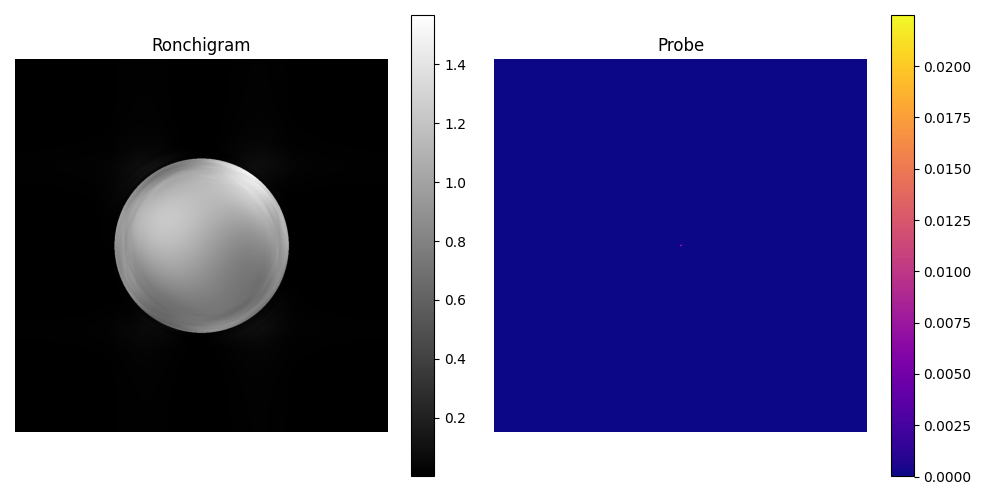

In [5]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

# View the Ronchigram
ax[0].set_title('Ronchigram')
ax[0].imshow(microscope.aberrations['ronchigram'], cmap = 'gray')
fig.colorbar(ax[0].imshow(microscope.aberrations['ronchigram'], cmap = 'gray'))

# View the Probe
ax[1].set_title('Probe')
ax[1].imshow(microscope.optics['probe'], cmap = 'gray')
fig.colorbar(ax[1].imshow(microscope.optics['probe'], cmap = 'plasma'))

for a in ax:
    a.axis('off')
fig.tight_layout()

### Get a scanned image

0.03
0.03
0.03


(-0.5, 511.5, 511.5, -0.5)

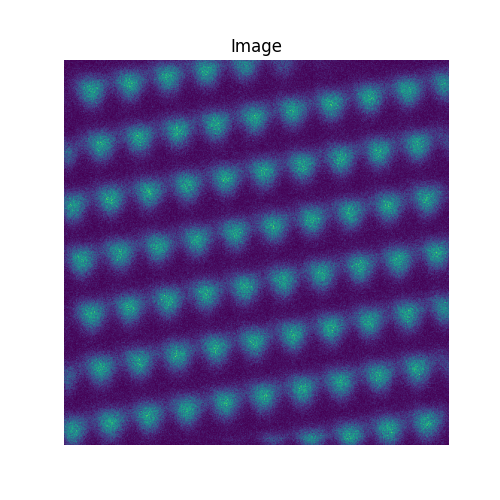

In [358]:
microscope.optics['fov'] = 40 # Ang
microscope.aberrations['C10'] = -10
microscope.aberrations['C23a'] = 200

microscope.aberrations['convergence_angle'] = 30
microscope.aberrations['fov'] = microscope.aberrations['FOV'] = microscope.fov

image = microscope.get_scanned_image(size=512, dwell_time=0.02, detector='haadf', seed=42, angle = 10)
probe = microscope.optics['probe']

fig, ax = plt.subplots(1,1, figsize = (5,5))
ax.imshow(image)
ax.set_title('Image')
ax.axis('off')

Now, there are obviously some edge effects.  The point of the digital twin is not to simulate perfect data, but to do a good-enough job for enabling higher-order machine learning

### Task 1: 

Make the simulation more accurate (edge effects, closer attention to Nyquist frequency, etc.)

### Task 2:

Add other crystal structures

### Task 3:

Convert the ~pseudo 'dwell_time' into a real electron count

### Task 4:

Find the atom positions

Reduce the dwell time until your method fails, and come up with a new method

### Task 6:

Create a random aberration generator (the aberrations have different relative ranges)

### Task 7:

Solve the aberrations to increase the image contrast

Solve the aberrations to decrease the atom size